In [81]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd
import re

speech_links = pd.read_csv(r'C:\Users\FYD\Documents\GitHub\lda-brazilian-books\src\books\discursos-presidenciais\discursos-presidenciais-links.txt',
                             delimiter='|')

speech_links.head(2)

,president,link
0,fhc,/pt-BR/discursos-artigos-e-entrevistas-categor...
1,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...


In [57]:
start = time.time()

BASE_URL = 'http://www.itamaraty.gov.br'

full_link = []
speech = []
for link in speech_links['link']:
    full_link.append(BASE_URL + link)
    
    response = requests.get(BASE_URL + link)
    soup = BeautifulSoup(response.text, 'html.parser')
    speech_text = soup.find("div", itemprop="articleBody")
    
    speech.append(speech_text)
    
print ("Process time: " + str((time.time() - start)))

Process time: 407.8306894302368


In [164]:
df_speech_consolidated = pd.concat([speech_links,
                                   pd.DataFrame(full_link),
                                   pd.DataFrame(speech)], axis=1)

df_speech_consolidated.columns = ['president', 'link', 'full_link', 'text']
df_speech_consolidated.head(5)

,president,link,full_link,text
0,fhc,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <div class=""plain..."
1,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."
2,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."
3,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."
4,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody""> <p style=""text-al..."


In [82]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]"\|@,;]')

from nltk.corpus import stopwords

#BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('portuguese'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = str(text)
    text = text.lower() # lowercase text
    text = text.replace("<div itemprop=\"articleBody\">", "")
    text = text.replace("<div class=\"plain\" id=\"parent-fieldname-text\">", "")
    text = text.replace("<p style=\"text-align: justify;\">", "")
    text = text.replace("<br/>", "")
    text = text.replace("</div>", "")
    text = text.replace("\n", "")
    text = text.replace(" < p>", "")    
    text = text.replace(".< p>", " ")
    text = text.replace(".", " ")
    text = text.replace("<div itemprop=\"articlebody\">", "")
    text = text.replace("<", "")
    text = text.replace(">", "")
    text = text.replace("style=/", "")
    text = text.replace("br/", "")
    text = text.replace("div/", "")
    text = text.replace("div", "")
    text = text.replace("/p", "")
    text = text.replace("...", "")
    text = text.replace("text-align", "")
     
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    #text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
    
df_speech_consolidated['text_processed'] = df_speech_consolidated['text'].apply(clean_text)

<>:1: DeprecationWarning: invalid escape sequence \[
<>:1: DeprecationWarning: invalid escape sequence \[
<>:1: DeprecationWarning: invalid escape sequence \[
<ipython-input-82-23db0acdbbfb>:1: DeprecationWarning: invalid escape sequence \[
  REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]"\|@,;]')


In [166]:
df_speech_consolidated.to_csv(r'C:\Users\FYD\Documents\GitHub\lda-brazilian-books\src\books\discursos-presidenciais\df_speech_consolidated.csv',
                             sep='|',
                             index_label=None)

In [167]:
df_speech_consolidated['text_processed'].head(1)[0]

'desejo antes tudo agradecer presidente jorge sampaio esposa maria josé ritta gesto receber palácio ajuda demonstração fidalguia distingue estimado casal amigo brasil amigo brasileiros convivência presidente sampaio faz nutrir apreço cada vez maior sítios históricos portugal sinto cativo palácio ajuda onde evoca nascimento rei comum d joão vi percebo próximo palácio bélem hospedou passagem ano mostra sobre carta pêro vaz caminha cujo catálogo satisfação prefaciar juntamente presidente sampaio ressaltei prefácio prestígio hoje cerca carta dom manuel i decorre apenas dotes narrativos escrivão resulta sobretudo fato encontro etnias descrito caminha vingou vingou bem dando margem universo civilizatório profícuos caracterizado ambos lados atlântico plasticidade cultural propensão assimilar influências diversos povos sobre atualidade lastro cultural une brasil portugal gostaria dizer algumas palavras hoje noite inspirado anfitriões jorge sampaio maria ritta tanto cultivam legado humanista ja

In [3]:
df_speech_consolidated = pd.read_csv(r'C:\Users\FYD\Documents\GitHub\lda-brazilian-books\src\books\discursos-presidenciais\df_speech_consolidated.csv',
                             delimiter='|',
                                    index_col=0)

df_speech_consolidated.head(2)

,president,link,full_link,text,text_processed
0,fhc,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody"">\n<div class=""plai...",desejo antes tudo agradecer presidente jorge s...
1,lula,/pt-BR/discursos-artigos-e-entrevistas-categor...,http://www.itamaraty.gov.br/pt-BR/discursos-ar...,"<div itemprop=""articleBody"">\n<p style=""text-a...",querido companheiro josé dirceu ministro-chefe...


In [4]:
# Basic counters
print(f'Qty rows: {df_speech_consolidated.shape[0]}, Qty columns: {df_speech_consolidated.shape[1]}')

Qty rows: 398, Qty columns: 5


In [5]:
# Show stats about the language per artist
df_speech_consolidated.groupby(['president']).size().reset_index()

,president,0
0,bolsonaro,5
1,dilma,191
2,fhc,1
3,lula,122
4,temer,79


In [66]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pyLDAvis
import pyLDAvis.sklearn
import random
import seaborn as sns
import string
from collections import Counter
from PIL import Image
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Generate graphs inline in Jupyter
%matplotlib inline
    
# Lock random seeds used by libraries
random.seed(42)
np.random.seed(42)
    
# Define function to cleanup text by removing 
# personal pronouns, stopwords, and puncuation
import spacy
nlp = spacy.load(r"C:\Users\FYD\Anaconda3\Lib\site-packages\pt_core_news_sm\pt_core_news_sm-2.1.0")
punctuations = string.punctuation

# Define default stopwords list
stoplist = spacy.lang.pt.stop_words.STOP_WORDS

In [73]:
stoplist.update('e')
stoplist.update('que')
stoplist.update('p')
stoplist.update('d')
stoplist.update('the')
stoplist.update('n')
stoplist.update('a')
stoplist.update('acerca')
stoplist.update('adeus')
stoplist.update('agora')
stoplist.update('ainda')
stoplist.update('alem')
stoplist.update('algmas')
stoplist.update('algo')
stoplist.update('algumas')
stoplist.update('alguns')
stoplist.update('ali')
stoplist.update('além')
stoplist.update('ambas')
stoplist.update('ambos')
stoplist.update('ano')
stoplist.update('anos')
stoplist.update('antes')
stoplist.update('ao')
stoplist.update('aonde')
stoplist.update('aos')
stoplist.update('apenas')
stoplist.update('apoio')
stoplist.update('apontar')
stoplist.update('apos')
stoplist.update('após')
stoplist.update('aquela')
stoplist.update('aquelas')
stoplist.update('aquele')
stoplist.update('aqueles')
stoplist.update('aqui')
stoplist.update('aquilo')
stoplist.update('as')
stoplist.update('assim')
stoplist.update('através')
stoplist.update('atrás')
stoplist.update('até')
stoplist.update('aí')
stoplist.update('baixo')
stoplist.update('bastante')
stoplist.update('bem')
stoplist.update('boa')
stoplist.update('boas')
stoplist.update('bom')
stoplist.update('bons')
stoplist.update('breve')
stoplist.update('cada')
stoplist.update('caminho')
stoplist.update('catorze')
stoplist.update('cedo')
stoplist.update('cento')
stoplist.update('certamente')
stoplist.update('certeza')
stoplist.update('cima')
stoplist.update('cinco')
stoplist.update('coisa')
stoplist.update('com')
stoplist.update('como')
stoplist.update('comprido')
stoplist.update('conhecido')
stoplist.update('conselho')
stoplist.update('contra')
stoplist.update('contudo')
stoplist.update('corrente')
stoplist.update('cuja')
stoplist.update('cujas')
stoplist.update('cujo')
stoplist.update('cujos')
stoplist.update('custa')
stoplist.update('cá')
stoplist.update('da')
stoplist.update('daquela')
stoplist.update('daquelas')
stoplist.update('daquele')
stoplist.update('daqueles')
stoplist.update('dar')
stoplist.update('das')
stoplist.update('de')
stoplist.update('debaixo')
stoplist.update('dela')
stoplist.update('delas')
stoplist.update('dele')
stoplist.update('deles')
stoplist.update('demais')
stoplist.update('dentro')
stoplist.update('depois')
stoplist.update('desde')
stoplist.update('desligado')
stoplist.update('dessa')
stoplist.update('dessas')
stoplist.update('desse')
stoplist.update('desses')
stoplist.update('desta')
stoplist.update('destas')
stoplist.update('deste')
stoplist.update('destes')
stoplist.update('deve')
stoplist.update('devem')
stoplist.update('deverá')
stoplist.update('dez')
stoplist.update('dezanove')
stoplist.update('dezasseis')
stoplist.update('dezassete')
stoplist.update('dezoito')
stoplist.update('dia')
stoplist.update('diante')
stoplist.update('direita')
stoplist.update('dispoe')
stoplist.update('dispoem')
stoplist.update('diversa')
stoplist.update('diversas')
stoplist.update('diversos')
stoplist.update('diz')
stoplist.update('dizem')
stoplist.update('dizer')
stoplist.update('do')
stoplist.update('dois')
stoplist.update('dos')
stoplist.update('doze')
stoplist.update('duas')
stoplist.update('durante')
stoplist.update('dá')
stoplist.update('dão')
stoplist.update('dúvida')
stoplist.update('e')
stoplist.update('ela')
stoplist.update('elas')
stoplist.update('ele')
stoplist.update('eles')
stoplist.update('em')
stoplist.update('embora')
stoplist.update('enquanto')
stoplist.update('entao')
stoplist.update('entre')
stoplist.update('então')
stoplist.update('era')
stoplist.update('eram')
stoplist.update('essa')
stoplist.update('essas')
stoplist.update('esse')
stoplist.update('esses')
stoplist.update('esta')
stoplist.update('estado')
stoplist.update('estamos')
stoplist.update('estar')
stoplist.update('estará')
stoplist.update('estas')
stoplist.update('estava')
stoplist.update('estavam')
stoplist.update('este')
stoplist.update('esteja')
stoplist.update('estejam')
stoplist.update('estejamos')
stoplist.update('estes')
stoplist.update('esteve')
stoplist.update('estive')
stoplist.update('estivemos')
stoplist.update('estiver')
stoplist.update('estivera')
stoplist.update('estiveram')
stoplist.update('estiverem')
stoplist.update('estivermos')
stoplist.update('estivesse')
stoplist.update('estivessem')
stoplist.update('estiveste')
stoplist.update('estivestes')
stoplist.update('estivéramos')
stoplist.update('estivéssemos')
stoplist.update('estou')
stoplist.update('está')
stoplist.update('estás')
stoplist.update('estávamos')
stoplist.update('estão')
stoplist.update('eu')
stoplist.update('exemplo')
stoplist.update('falta')
stoplist.update('fará')
stoplist.update('favor')
stoplist.update('faz')
stoplist.update('fazeis')
stoplist.update('fazem')
stoplist.update('fazemos')
stoplist.update('fazer')
stoplist.update('fazes')
stoplist.update('fazia')
stoplist.update('faço')
stoplist.update('fez')
stoplist.update('fim')
stoplist.update('final')
stoplist.update('foi')
stoplist.update('fomos')
stoplist.update('for')
stoplist.update('fora')
stoplist.update('foram')
stoplist.update('forem')
stoplist.update('forma')
stoplist.update('formos')
stoplist.update('fosse')
stoplist.update('fossem')
stoplist.update('foste')
stoplist.update('fostes')
stoplist.update('fui')
stoplist.update('fôramos')
stoplist.update('fôssemos')
stoplist.update('geral')
stoplist.update('grande')
stoplist.update('grandes')
stoplist.update('grupo')
stoplist.update('ha')
stoplist.update('haja')
stoplist.update('hajam')
stoplist.update('hajamos')
stoplist.update('havemos')
stoplist.update('havia')
stoplist.update('hei')
stoplist.update('hoje')
stoplist.update('hora')
stoplist.update('horas')
stoplist.update('houve')
stoplist.update('houvemos')
stoplist.update('houver')
stoplist.update('houvera')
stoplist.update('houveram')
stoplist.update('houverei')
stoplist.update('houverem')
stoplist.update('houveremos')
stoplist.update('houveria')
stoplist.update('houveriam')
stoplist.update('houvermos')
stoplist.update('houverá')
stoplist.update('houverão')
stoplist.update('houveríamos')
stoplist.update('houvesse')
stoplist.update('houvessem')
stoplist.update('houvéramos')
stoplist.update('houvéssemos')
stoplist.update('há')
stoplist.update('hão')
stoplist.update('iniciar')
stoplist.update('inicio')
stoplist.update('ir')
stoplist.update('irá')
stoplist.update('isso')
stoplist.update('ista')
stoplist.update('iste')
stoplist.update('isto')
stoplist.update('já')
stoplist.update('lado')
stoplist.update('lhe')
stoplist.update('lhes')
stoplist.update('ligado')
stoplist.update('local')
stoplist.update('logo')
stoplist.update('longe')
stoplist.update('lugar')
stoplist.update('lá')
stoplist.update('maior')
stoplist.update('maioria')
stoplist.update('maiorias')
stoplist.update('mais')
stoplist.update('mal')
stoplist.update('mas')
stoplist.update('me')
stoplist.update('mediante')
stoplist.update('meio')
stoplist.update('menor')
stoplist.update('menos')
stoplist.update('meses')
stoplist.update('mesma')
stoplist.update('mesmas')
stoplist.update('mesmo')
stoplist.update('mesmos')
stoplist.update('meu')
stoplist.update('meus')
stoplist.update('mil')
stoplist.update('minha')
stoplist.update('minhas')
stoplist.update('momento')
stoplist.update('muito')
stoplist.update('muitos')
stoplist.update('máximo')
stoplist.update('mês')
stoplist.update('na')
stoplist.update('nada')
stoplist.update('nao')
stoplist.update('naquela')
stoplist.update('naquelas')
stoplist.update('naquele')
stoplist.update('naqueles')
stoplist.update('nas')
stoplist.update('nem')
stoplist.update('nenhuma')
stoplist.update('nessa')
stoplist.update('nessas')
stoplist.update('nesse')
stoplist.update('nesses')
stoplist.update('nesta')
stoplist.update('nestas')
stoplist.update('neste')
stoplist.update('nestes')
stoplist.update('no')
stoplist.update('noite')
stoplist.update('nome')
stoplist.update('nos')
stoplist.update('nossa')
stoplist.update('nossas')
stoplist.update('nosso')
stoplist.update('nossos')
stoplist.update('nova')
stoplist.update('novas')
stoplist.update('nove')
stoplist.update('novo')
stoplist.update('novos')
stoplist.update('num')
stoplist.update('numa')
stoplist.update('numas')
stoplist.update('nunca')
stoplist.update('nuns')
stoplist.update('não')
stoplist.update('nível')
stoplist.update('nós')
stoplist.update('número')
stoplist.update('o')
stoplist.update('obra')
stoplist.update('obrigada')
stoplist.update('obrigado')
stoplist.update('oitava')
stoplist.update('oitavo')
stoplist.update('oito')
stoplist.update('onde')
stoplist.update('ontem')
stoplist.update('onze')
stoplist.update('os')
stoplist.update('ou')
stoplist.update('outra')
stoplist.update('outras')
stoplist.update('outro')
stoplist.update('outros')
stoplist.update('para')
stoplist.update('parece')
stoplist.update('parte')
stoplist.update('partir')
stoplist.update('paucas')
stoplist.update('pegar')
stoplist.update('pela')
stoplist.update('pelas')
stoplist.update('pelo')
stoplist.update('pelos')
stoplist.update('perante')
stoplist.update('perto')
stoplist.update('pessoas')
stoplist.update('pode')
stoplist.update('podem')
stoplist.update('poder')
stoplist.update('poderá')
stoplist.update('podia')
stoplist.update('pois')
stoplist.update('ponto')
stoplist.update('pontos')
stoplist.update('por')
stoplist.update('porque')
stoplist.update('porquê')
stoplist.update('portanto')
stoplist.update('posição')
stoplist.update('possivelmente')
stoplist.update('posso')
stoplist.update('possível')
stoplist.update('pouca')
stoplist.update('pouco')
stoplist.update('poucos')
stoplist.update('povo')
stoplist.update('primeira')
stoplist.update('primeiras')
stoplist.update('primeiro')
stoplist.update('primeiros')
stoplist.update('promeiro')
stoplist.update('propios')
stoplist.update('proprio')
stoplist.update('própria')
stoplist.update('próprias')
stoplist.update('próprio')
stoplist.update('próprios')
stoplist.update('próxima')
stoplist.update('próximas')
stoplist.update('próximo')
stoplist.update('próximos')
stoplist.update('puderam')
stoplist.update('pôde')
stoplist.update('põe')
stoplist.update('põem')
stoplist.update('quais')
stoplist.update('qual')
stoplist.update('qualquer')
stoplist.update('quando')
stoplist.update('quanto')
stoplist.update('quarta')
stoplist.update('quarto')
stoplist.update('quatro')
stoplist.update('que')
stoplist.update('quem')
stoplist.update('quer')
stoplist.update('quereis')
stoplist.update('querem')
stoplist.update('queremas')
stoplist.update('queres')
stoplist.update('quero')
stoplist.update('questão')
stoplist.update('quieto')
stoplist.update('quinta')
stoplist.update('quinto')
stoplist.update('quinze')
stoplist.update('quáis')
stoplist.update('quê')
stoplist.update('relação')
stoplist.update('sabe')
stoplist.update('sabem')
stoplist.update('saber')
stoplist.update('se')
stoplist.update('segunda')
stoplist.update('segundo')
stoplist.update('sei')
stoplist.update('seis')
stoplist.update('seja')
stoplist.update('sejam')
stoplist.update('sejamos')
stoplist.update('sem')
stoplist.update('sempre')
stoplist.update('sendo')
stoplist.update('ser')
stoplist.update('serei')
stoplist.update('seremos')
stoplist.update('seria')
stoplist.update('seriam')
stoplist.update('será')
stoplist.update('serão')
stoplist.update('seríamos')
stoplist.update('sete')
stoplist.update('seu')
stoplist.update('seus')
stoplist.update('sexta')
stoplist.update('sexto')
stoplist.update('sim')
stoplist.update('sistema')
stoplist.update('sob')
stoplist.update('sobre')
stoplist.update('sois')
stoplist.update('somente')
stoplist.update('somos')
stoplist.update('sou')
stoplist.update('sua')
stoplist.update('suas')
stoplist.update('são')
stoplist.update('sétima')
stoplist.update('sétimo')
stoplist.update('só')
stoplist.update('tal')
stoplist.update('talvez')
stoplist.update('tambem')
stoplist.update('também')
stoplist.update('tanta')
stoplist.update('tantas')
stoplist.update('tanto')
stoplist.update('tarde')
stoplist.update('te')
stoplist.update('tem')
stoplist.update('temos')
stoplist.update('tempo')
stoplist.update('tendes')
stoplist.update('tenha')
stoplist.update('tenham')
stoplist.update('tenhamos')
stoplist.update('tenho')
stoplist.update('tens')
stoplist.update('tentar')
stoplist.update('tentaram')
stoplist.update('tente')
stoplist.update('tentei')
stoplist.update('ter')
stoplist.update('terceira')
stoplist.update('terceiro')
stoplist.update('terei')
stoplist.update('teremos')
stoplist.update('teria')
stoplist.update('teriam')
stoplist.update('terá')
stoplist.update('terão')
stoplist.update('teríamos')
stoplist.update('teu')
stoplist.update('teus')
stoplist.update('teve')
stoplist.update('tinha')
stoplist.update('tinham')
stoplist.update('tipo')
stoplist.update('tive')
stoplist.update('tivemos')
stoplist.update('tiver')
stoplist.update('tivera')
stoplist.update('tiveram')
stoplist.update('tiverem')
stoplist.update('tivermos')
stoplist.update('tivesse')
stoplist.update('tivessem')
stoplist.update('tiveste')
stoplist.update('tivestes')
stoplist.update('tivéramos')
stoplist.update('tivéssemos')
stoplist.update('toda')
stoplist.update('todas')
stoplist.update('todo')
stoplist.update('todos')
stoplist.update('trabalhar')
stoplist.update('trabalho')
stoplist.update('treze')
stoplist.update('três')
stoplist.update('tu')
stoplist.update('tua')
stoplist.update('tuas')
stoplist.update('tudo')
stoplist.update('tão')
stoplist.update('tém')
stoplist.update('têm')
stoplist.update('tínhamos')
stoplist.update('um')
stoplist.update('uma')
stoplist.update('umas')
stoplist.update('uns')
stoplist.update('usa')
stoplist.update('usar')
stoplist.update('vai')
stoplist.update('vais')
stoplist.update('valor')
stoplist.update('veja')
stoplist.update('vem')
stoplist.update('vens')
stoplist.update('ver')
stoplist.update('verdade')
stoplist.update('verdadeiro')
stoplist.update('vez')
stoplist.update('vezes')
stoplist.update('viagem')
stoplist.update('vindo')
stoplist.update('vinte')
stoplist.update('você')
stoplist.update('vocês')
stoplist.update('vos')
stoplist.update('vossa')
stoplist.update('vossas')
stoplist.update('vosso')
stoplist.update('vossos')
stoplist.update('vários')
stoplist.update('vão')
stoplist.update('vêm')
stoplist.update('vós')
stoplist.update('zero')
stoplist.update('à')
stoplist.update('às')
stoplist.update('área')
stoplist.update('é')
stoplist.update('éramos')
stoplist.update('és')
stoplist.update('último')

In [49]:
# Data exploration in some specific class to see the most frequent words
def get_word_frequency(artist):

    # Word Frequency per Category
    def cleanup_text(docs, logging=False):
        texts = []
        counter = 1
        for doc in docs:
            if counter % 1000 == 0 and logging:
                print("Processed %d out of %d documents." % (counter, len(docs)))
            counter += 1
            doc = nlp(doc, disable=['parser', 'ner'])
            tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
            tokens = [tok for tok in tokens if tok not in stoplist and tok not in punctuations]
            tokens = ' '.join(tokens)
            texts.append(tokens)
        return pd.Series(texts)

    df_text = [text for text in df_speech_consolidated[df_speech_consolidated['president'] == artist]['text']]
    df_text_clean = cleanup_text(df_text)
    df_text_clean = ' '.join(df_text_clean).split()
    df_text_clean_counts = Counter(df_text_clean)
    df_common_words = [word[0] for word in df_text_clean_counts.most_common(31)]
    df_common_counts = [word[1] for word in df_text_clean_counts.most_common(31)]
    df_common_words.pop(0)
    df_common_counts.pop(0)

    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=df_common_words, y=df_common_counts)
    plt.title(f'Most Common Words used by {artist}')
    plt.xticks(rotation=45)
    plt.show()
    
    fig.savefig(f'word_frequency_{artist}.png', format='png', dpi=500)

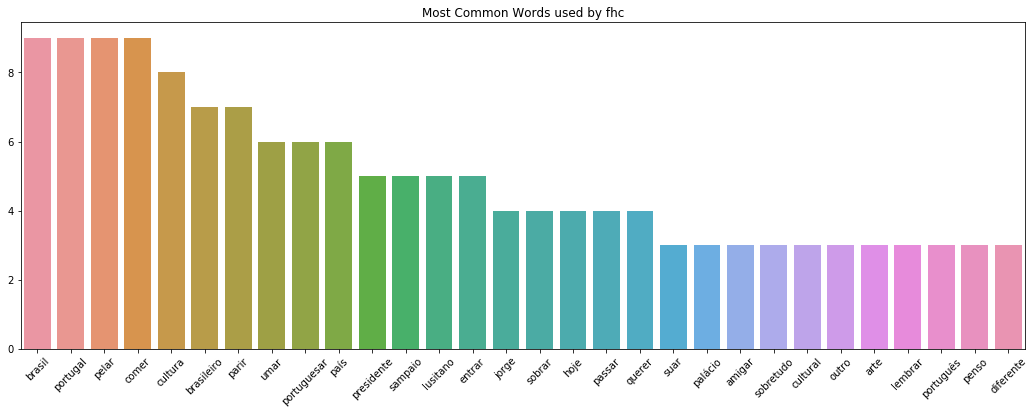

In [83]:
get_word_frequency('fhc')

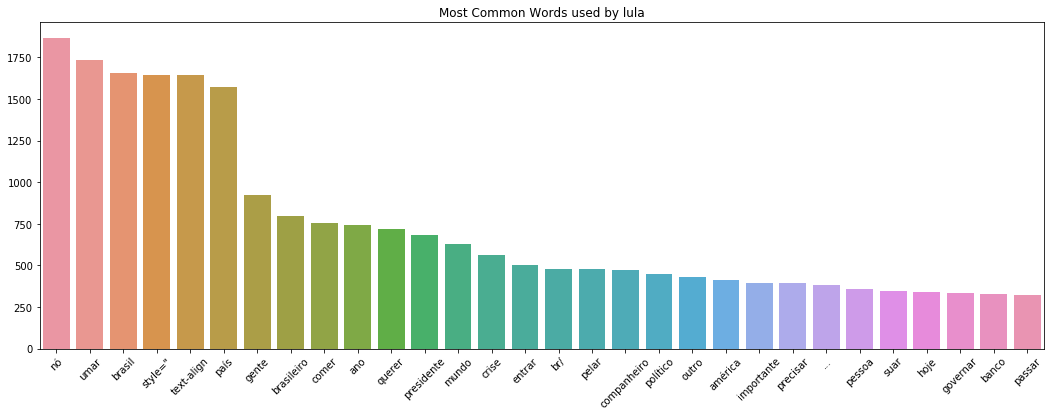

In [84]:
get_word_frequency('lula')

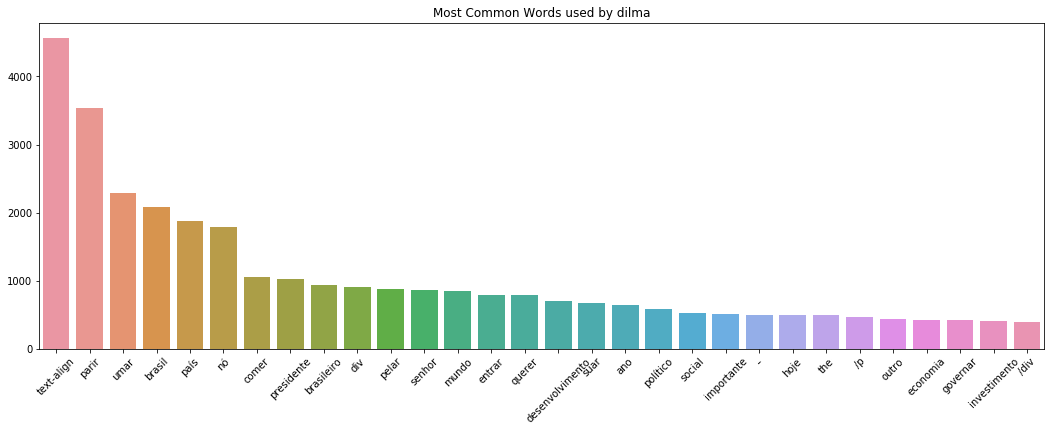

In [85]:
get_word_frequency('dilma')

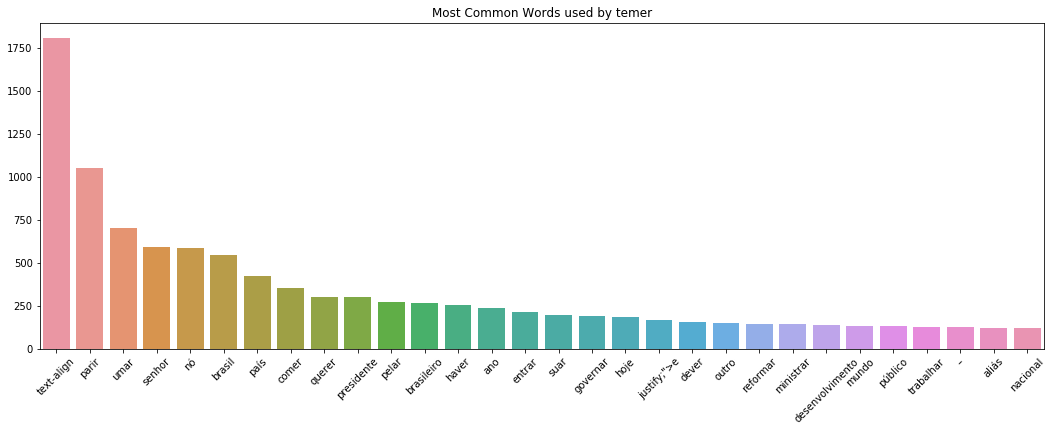

In [86]:
get_word_frequency('temer')

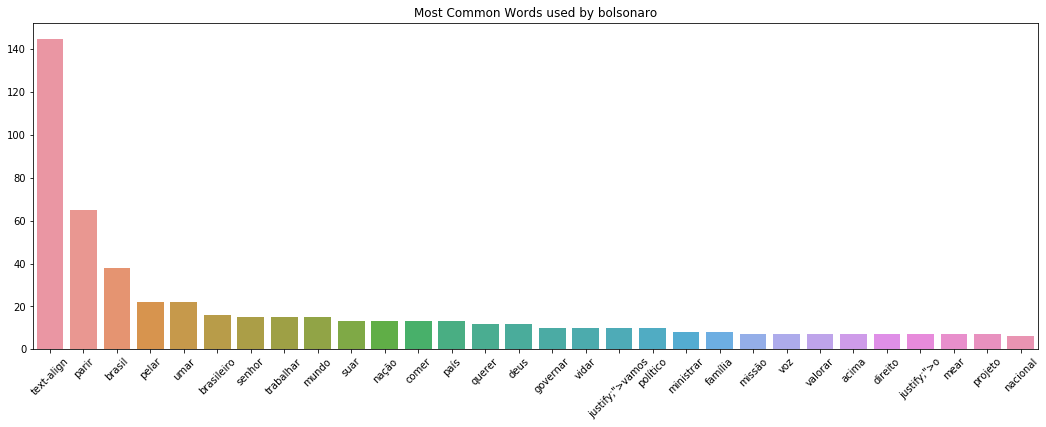

In [87]:
get_word_frequency('bolsonaro')